In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

def floatize(items, data):
    for item in items:
        data[item] = data[item].astype(float)
    return data

In [2]:
viewfactor1 = "hs_dem_in_sess"
viewfactor2 = "hs_rep_in_sess"

clist = ["year", "st", "stateno", "state", "state_fips", "state_icpsr", "pollib_median", "pollib_lower", "pollib_upper", "pollib_sd", "st_ec", "st_soc", "avgec_low", "avgsoc_low", "avgec_mid", "avgsoc_mid", "avgec_high", "avgsoc_high", "vst_ec", "vst_soc", "vavgec_low", "vavgsoc_low", "vavgec_mid", "vavgsoc_mid", "vavgec_high", "vavgsoc_high", "innovatescore_boehmkeskinner", "policypriorityscore", "yrstatehd", "w_ec_access", "abortion_consent_1973_1991", "abortion_consent_1992_2014", "abortion_reform_preroe", "w_abortion_parental_notice_1983_", "abortion_partial_birth", "abortion_medicaid", "aborparc", "aborparn", "aborpreroe", "drugs_boehmke_statrapage", "death_penalty", "w_animal_cruelty_felony", "broadcom", "cappun", "childabu", "civinjaut", "correct", "cyberstalk", "harass", "hatecrime", "idtheft", "indorgris", "juvisup", "parolesup", "postdna", "sexreginfo", "stalkdef", "statrapage", "strikes", "viccomp", "vicrtsamd", "drugs_boehmke_kegreg", "drugs_marijua_decrimilization", "drugs_medical_marijua", "drugs_boehmke_mlda21", "drugs_smoking_ban_workplaces", "drugs_smoking_ban_restaurants", "drugs_boehmke_zerotol", "alcbevcon", "alctreat", "dui08", "kegreg", "medmar", "methpre", "mlda21", "pdrugmon", "smokeban", "zerotol", "w_education_biblereading", "education_corporal_punishment_ba", "z_education_expenditures_per_pup", "w_education_moment_of_silence", "z_education_higher_edu_spending", "education_teacher_cert_hs", "education_teacher_cert_elementar", "education_schoolfordeaf", "education_librarysystem", "arts", "chartersch", "education", "edutv", "hsexit", "schoolchoi", "teacelm", "environment_air_pollution_contro", "environment_bottlebill", "environment_ca_car_emissions_sta", "environment_electronic_waste", "w_environment_endangered_species", "environment_state_nepas", "environment_ghg_cap", "environment_publicbenefit_funds", "w_environment_solar_taxcredit", "environ", "natreso", "renewport", "soil", "gambling_casinos", "gambling_lottery_adoption", "indgaming", "lott", "w_gayrights_public_accomodations", "w_gayrights_civilunions_marriage", "w_gayrights_employment_discrimit", "gayrights_hatecrimes", "gayrights_ban_sodomy", "gaymarban", "giexorder", "gilaw", "soexorder", "solaw", "absvot", "adcom", "citzon", "cogrowman", "crtadm", "earlvot", "econdev", "enterzone", "humrel", "legpre", "missplan", "motorvoter", "norealid", "pldvpag", "pubcamfun", "shield", "stplnb", "termlim", "urbrenen", "guncontrol_assaultweapon_ban", "w_guncontrol_bc_dealers", "w_guncontrol_bc_privatesales", "guncontrol_licenses_dealers", "w_guncontrol_waitingperiod", "guncontrol_opencarry", "guncontrol_satnightspecial_ban", "guncontrol_stand_your_ground", "w_guncontrol_registration_requir", "bradycamp", "immigration_english_language", "immigration_instate_tuition_ille", "labor_age_discrimition", "labor_antiinjunction_laws", "labor_collective_bargaining_stat", "labor_collective_bargaining_teac", "w_labor_state_ada", "labor_merit_system", "labor_minwage_abovefed", "labor_minimumwage_men", "labor_minimumwage_women_anymajor", "labor_prevailing_wage_laws", "labor_right_to_work", "labor_state_retirement_system", "labor_state_disability_insurance", "z_labor_unemployment_compensatio", "labor_workers_compensation", "x_labor_childlabor_workpermitage", "x_labor_childlabor_ageleaveschoo", "w_labor_relations_acts", "antiinj", "fairemp", "fairtrade", "miglab", "minwage", "sals", "licenses_chiropractors", "licenses_dentists", "licenses_architects", "licenses_beauticians", "licenses_pharmacists", "licenses_engineers", "licenses_nurses", "licenses_accountants", "licenses_real_estate", "beaulic", "intbar", "realest", "regulation_sedition_laws", "regulation_forced_sterlizations", "regulation_boehmke_grandvist", "regulation_hate_crimes", "regulation_housing_ebling_federa", "regulation_housing_directstateai", "regulation_boehmke_livingwill", "regulation_pain_suffering_limits", "regulation_physician_suicide", "regulation_boehmke_cogrowman", "regulation_boehmke_shield", "regulation_rent_control", "regulation_rfra", "regulations_state_debt_limitatio", "regulations_homerule", "regulations_lemonlaw", "regulation_utility_jurisdiction", "bottle", "ccreceipt", "credfreez", "elecdereg", "grandvist", "lemon", "livingwill", "pestcomp", "retainag", "race_school_segregation", "race_interracial_marriage_banned", "w_race_disc_public_accom2", "w_race_disc_public_accommodation", "race_fair_employment_commissions", "race_fair_employ_comm_post1964", "w_race_fair_housing_private", "race_boehmke_fhpub", "race_boehmke_fhurb", "fhpriv", "fhpub", "fhurb", "segoss", "cig_taxes_biry", "z_cigarette_taxes", "earned_income_taxcredit", "income_taxes", "x_tax_rate_rich", "sales_taxes_biry_pre1946", "x_sales_taxes", "x_tax_burden", "x_top_corporateincometaxrate", "corporate_incometax", "estate_tax", "cigtax", "gastax", "inctax", "lien", "revenue", "tels", "transportation_controlledaccessh", "regulation_bicycle_helmets", "regulation_mandatory_seatbelts", "regulation_motorcycle_helmets", "regulation_mandatory_car_insuran", "autosaf", "childseat", "conacchwy", "gdl", "kidhelmet", "motorhelm", "primseat", "prkagcit", "transport", "z_ssi_afdc_families_payments", "afdc_up", "z_ssi_blind_payments", "z_ssi_disabled_payments", "z_ssi_blind_payments_post1965", "z_ssi_disabled_payments_post1965", "x_chip_children", "x_chip_infants", "z_ssi_ga_payments_per_case", "z_ssi_ga_payments_per_recipient", "x_chip_pregntwomen", "x_chip_pregntwomen_prebba", "z_ssi_old_age_payments", "z_ssi_old_age_payments_post1965", "boehmke_snrpresc", "medicaid_stateadoption", "z_tanf_paymentsperfamily", "z_tanf_initialelig", "z_tanf_maxpayment", "adc", "aging", "aidperm", "banfaninc", "bangag", "blind", "colcanscr", "comage", "contrains", "famcap", "health", "higissue", "higrenew", "hiport", "hiprecon", "hmomod1", "hmomod2", "idas", "infanthear", "kinship", "mailreg", "manclin", "mntlhlth", "msas", "oldagea", "pubhouen", "recipsup", "rightdie", "sdce", "snrpresc", "timelim", "genderrights_gender_equal_pay", "genderrights_era_ratification", "genderrights_jury_service", "genderrights_state_eras", "genderrights_gender_discrimition", "genrights_genddiscrim_post1964", "genderrights_nofault_divorce", "equalpay", "offwmh", "pubbrefeed", "gunbckcheck", "cartheftrate", "carthefttotal", "murderrate", "murdertotal", "propcrimerate", "propcrimetotal", "raperate", "rapetotal", "robrate", "vcrimerate", "vcrimetotal", "poptotal", "popdensity", "popfemale", "popmale", "popunder5", "pop5to17", "pop18to24", "pop25to44", "pop45to64", "popover65", "popover85", "evangelical_pop", "nonwhite", "licdrivers", "abortionrate", "divorcerate", "birthrate", "newimmig", "refugeetotal", "know_gov", "know_govparty", "partisan_knowledge_scale", "soc_capital", "soc_capital_ma", "region_census", "is_a_state", "dc_dummy", "odd_even_year", "personal_income1000s_annual", "personal_income1000s", "personal_income1000s_exists", "pop_annual", "disposable_personal_income1000s_", "statemin", "incshare_top10", "incshare_top5", "incshare_top1", "incshare_top05", "incshare_top01", "incshare_top001", "atkin_index", "gini_coef", "theil_index", "pop_growth", "pop_quar", "pop_quar_exists", "pc_inc_ann", "state_cpi_bfh", "regional_cpi_bls_quar", "nat_cpi_bls_quar", "housing_prices_quar", "state_cpi_bfh_est", "bfh_cpi_multiplier", "state_cpi_bfh_est_quar", "inc_multiplier", "personal_income1000s_b", "personal_income1000s_b_exists", "real_inc1000s_quar", "real_inc1000s_quar_exists", "real_pc_inc_quar", "real_pc_inc_quar_exists", "real_pc_inc_quar_exists2", "pc_inc_quar", "pc_inc_quar_exists", "gsp_naics_ann", "gsp_naics_ann_exists", "gsp_naics_ann_exists2", "gsp_sic_ann", "gsp_sic_ann_exists", "gsp_sic_ann_exists2", "gsp_naics_ann_multiplier", "gsp_sic_ann_multiplier", "gsp_naics_q", "gsp_sic_q", "gsp_q", "gov_fin_fy", "budg_lag_from_fy_end", "total_debt_outstanding", "total_revenue", "general_revenue", "taxes", "total_expenditure", "general_expenditure", "state_gov_finance_exists", "spending_stfunds_perincome", "spending_fedfunds_perincome", "employ_pop", "change_proptax", "change_bustax_other", "change_utiltax", "change_amustax", "change_docstocktax", "change_corptax", "change_corplicrev", "change_salestax", "change_incometax", "change_sevtax", "change_fueltax", "change_tobtax", "change_vehtax", "change_stincometax", "wine_tax", "wine_tax_rank", "spirit_tax", "spirit_tax_rank", "beer_tax", "beer_tax_rank", "fedshare_rev", "med_spending_own", "dayreserve_genfund", "endingbal_rainyday", "res_genfund", "fy_end_month", "fy_end_day", "fy_end_quar", "non_june_30_fy_end_date", "legislative_current_op_exp", "legislative_construction_exp", "legislative_other_capital_exp", "legislative_equipment_exp", "legislative_total_exp1", "legislative_total_exp1_exists", "legislative_total_exp1_note", "legislative_total_exp2", "legislative_total_exp2_exists", "legislative_total_exp", "legislative_total_exp_exists", "budget_surplus", "total_debt_outstanding_gsp", "total_revenue_gsp", "general_revenue_gsp", "taxes_gsp", "total_expenditure_gsp", "general_expenditure_gsp", "budget_surplus_gsp", "total_debt_outstanding_inc", "total_revenue_inc", "general_revenue_inc", "taxes_inc", "total_expenditure_inc", "general_expenditure_inc", "budget_surplus_inc", "real_leg_tot_exp", "real2_leg_tot_exp", "real2_inc_quar", "real2_pc_inc_quar", "taxcapacityindex", "taxeffortindex", "regfree", "regrank", "econfree", "econrank", "fiscfree", "fiscrank", "persfree", "persrank", "freedom", "ranking", "gunfree", "alcfree", "mjfree", "autofree", "gamfree", "malafree", "edufree", "forfree", "vcfree", "marrfree", "elecfree", "tobfree", "landfree", "labfree", "healthfree", "utilfree", "occfree", "tortfree", "miscregfree", "efna_index", "c_ce_i", "c_ce_i_r", "total_current_assets", "current_liabilities", "noncurrent_liabilities", "unrestricted_net_assets", "restricted_net_assets", "total_net_assets", "total_assets", "total_liabilities", "total_taxes", "total_revenue_mercatus", "total_expenses", "noncurrent_liability", "change_in_net_assets", "uaal_pension", "uaal_opeb", "primary_gov_debt", "cash_ratio", "quick_ratio", "current_ratio", "op_ratio", "surplus_percap", "net_asst_rat", "long_term_liab", "lt_percapita", "tax_income_ratio", "rev_income_ratio", "exp_income_ratio", "primarydebt_income_ratio", "pension_income_ratio", "opeb_income_ratio", "cash_index", "lr_solvencyindex", "budgt_solv", "ser_lvl_solv", "trust_fund_solv", "fisc_cond_w_trust_fund", "pctwomenearn", "valueofagsect", "unemployment", "employed", "unemployed", "taxrevcorporate", "patents", "hincomemed", "lotticksales", "lotprize", "lotadmincosts", "incomepcap", "gsppcap", "gsptotal", "farmpayment", "povrate", "marginallyfoodinsecure", "foodinsecure", "verylowfoodsecure", "foodstampben", "afdc_rep", "afdc_case", "afdccases_childonly", "foodstamp_rep", "foodstamp_case", "wicparticipation", "nslp_free", "nslp_reduced", "nslp_total", "sbp_free", "sbp_reduced", "sbp_total", "welfare_spending_percap", "ssistate", "totalssi", "ssirecipients_total", "ssirecipients_aged", "ssirecipients_blind", "ssirecipients_disabled", "cash_assist_percap", "unemploy_comp_percap", "workerscompensation", "stateeitcrate", "firms", "bankrupt", "educspend", "hsdiploma", "edattendrate", "eddayattendrate", "eddropoutrate", "edinstruct_pct_expend", "edinstruct_expend_pstud", "pupilteachratio", "edtotalexpend", "enrollstudents", "mathscore4th", "readscore4th", "noofvotes", "vepvotingrate", "vep", "nofelons", "elect_year", "sen_prop_up", "hs_prop_up", "ranney1_sen_dem_prop", "ranney2_hs_dem_prop", "ranney3_gub_prop", "ranney4_control", "ranney4_control_alt", "ranney1_sen_dem_prop_4yr", "ranney2_hs_dem_prop_4yr", "ranney3_gub_prop_4yr", "ranney4_control_4yr", "ranney4_control_alt_4yr", "ranney1_sen_dem_prop_6yr", "ranney2_hs_dem_prop_6yr", "ranney3_gub_prop_6yr", "ranney4_control_6yr", "ranney4_control_alt_6yr", "ranney1_sen_dem_prop_8yr", "ranney2_hs_dem_prop_8yr", "ranney3_gub_prop_8yr", "ranney4_control_8yr", "ranney4_control_alt_8yr", "ranney1_sen_dem_prop_10yr", "ranney2_hs_dem_prop_10yr", "ranney3_gub_prop_10yr", "ranney4_control_10yr", "ranney4_control_alt_10yr", "ranney_4yrs", "ranney_6yrs", "ranney_8yrs", "ranney_10yrs", "ranney_4yrs_alt", "ranney_6yrs_alt", "ranney_8yrs_alt", "ranney_10yrs_alt", "folded_ranney_4yrs", "folded_ranney_6yrs", "folded_ranney_8yrs", "folded_ranney_10yrs", "folded_ranney_alt_4yrs", "folded_ranney_alt_6yrs", "folded_ranney_alt_8yrs", "folded_ranney_alt_10yrs", "hvd1_winper_4yr", "hvd2_winmargin_4yr", "hvd3_uncont_4yr", "hvd4_safeseat_4yr", "unusable_seats_4yr_per", "hvd1_winper_6yr", "hvd2_winmargin_6yr", "hvd3_uncont_6yr", "hvd4_safeseat_6yr", "unusable_seats_6yr_per", "hvd1_winper_8yr", "hvd2_winmargin_8yr", "hvd3_uncont_8yr", "hvd4_safeseat_8yr", "unusable_seats_8yr_per", "hvd1_winper_10yr", "hvd2_winmargin_10yr", "hvd3_uncont_10yr", "hvd4_safeseat_10yr", "unusable_seats_10yr_per", "hvd_4yr", "hvd_6yr", "hvd_8yr", "hvd_10yr", "sf_hvd_4yr", "sf_ranney_4yr", "sf_hvd_8yr", "sf_ranney_8yr", "sf_hvd_10yr", "sf_ranney_10yr", "gov_contrib", "house_contrib", "senate_contrib", "court_contrib", "ballot_contrib", "dem_contrib", "rep_contrib", "nonindiv_contrib", "contrib_to_incumbs", "contrib_to_dems", "contrib_to_reps", "contrib_to_thirdparty", "contrib_agri", "contrib_candidates", "contrib_comm_elect", "contrib_construction", "contrib_defense", "contrib_energy_natres", "contrib_gov_ed_other", "contrib_health", "cotrib_ideo_singiss", "contrib_labor", "contrib_lawyer_lobby", "contrib_transp", "contrib_unitemized", "contrib_fin_ins_realestate", "contrib_public_subsidy", "contrib_business", "contrib_party", "overall_fin_reg", "disclosure_fin_reg", "public_fin_reg", "contrib_fin_reg", "indlimit", "famlim", "candlim", "corporlimits", "unionlimits", "bus_energy_consum", "bus_energy_consum_pc", "res_energy_price", "co2emissions", "integrity", "prez_election_year", "weird5", "weird5_b", "biennium", "biennium_b", "biennium_first_year", "biennium_second_year", "govname1", "govname1_sour", "govname1_date", "govname2", "govname2_sour", "govname2_date", "govname2_notes", "gub_election", "gub_election_regime", "gov_midyear_change_date", "gov_midyear_change_month", "gov_midyear_change_day", "gov_midyear_change_ordinal_day", "gov_midyear_change_a", "budget_pass2011_04_20", "when_leg_met2011_04_13", "gov_midyear_change_b", "gov_midyear_change_b_note", "new_gov_b", "past_gov", "past_gov_note", "gov_midyear_change_c", "gov_midyear_change_c_note", "new_gov_c", "new_gov_d", "fracleg_old_variable", "fracleg_old_variable_note", "years_served", "budgets_overseen", "years_served_budgets_overseen_no", "term_length", "years_left_in_term", "limit_exists", "limit_type", "term_limit_length_uncertainty", "years_left_before_limit", "years_left_before_limit_note", "years_left_before_limit_uncertai", "lame_duck_last_term", "lame_duck_last_year", "lame_duck_last_2nd_to_last_year", "lame_duck_notes", "femgov", "femgov_notes", "stateleg", "stateleg_source", "congmem", "congmem_sour", "stateleg_congmem_notes", "legexper", "party_midyear_change", "party_midyear_change_direction", "govparty_a", "party_midbiennium_change", "party_midbiennium_change_directi", "govparty_b", "govparty_b_2", "state_midterm_penalty", "govparty_c", "gov_non_maj_pty", "gub_party_change", "gov_pty_change_since_last_budget", "years_since_other_party", "open_bcs_term_limit", "sen_elections_this_year", "sen_dem_in_sess", "sen_rep_in_sess", "sen_ind_in_sess", "sen_vac_in_sess", "sen_tot_in_sess", "sen_cont_alt", "hs_elections_this_year", "hs_dem_in_sess", "hs_rep_in_sess", "hs_ind_in_sess", "hs_vac_in_sess", "hs_tot_in_sess", "hs_cont_alt", "veto_override_prop", "veto_override_prop_elected", "leg_cont", "split_leg", "divided_gov", "sen_dem_prop_all", "sen_rep_prop_all", "hs_dem_prop_all", "hs_rep_prop_all", "per_leg_of_govs_pty", "dem_veto_proof", "rep_veto_proof", "dem_unified", "rep_unified", "acounty", "amuni", "atown", "sen_chamber", "hou_dem", "hou_rep", "hou_majority", "sen_dem", "sen_rep", "sen_majority", "h_diffs", "s_diffs", "h_distance", "s_distance", "h_dem_sd", "s_dem_sd", "h_rep_sd", "s_rep_sd", "h_chamber_sd", "s_chamber_sd", "hou_dem_error", "hou_chamber_error", "hou_rep_error", "hou_majority_error", "sen_dem_error", "sen_chamber_error", "sen_rep_error", "sen_majority_error", "legprofscore", "sess_length", "leg_realsalary", "leg_expend", "bowen_legprof_firstdim", "bowen_legprof_seconddim", "pctfemaleleg", "inst6013_adacope", "inst6014_nom", "speaker_power", "stctprof_rank", "stctprof_score", "stctprofprem_rank", "stctprofprem_score", "stctprofdisc_rank", "stctprofdisc_score", "stctprofpremdisc_rank", "stctprofpremdisc_score", "corrupt_convict", "popgovhealthins", "popnohealthins", "lowincchildren_number", "popprivhealthins", "healthspendpc", "infantmortality", "med_enroll_aged", "med_enroll_disab", "med_enroll_adult", "med_enroll_child", "med_enroll_total", "med_spend_aged", "med_spend_disab", "med_spend_adult", "med_spend_child", "med_spend_total", "igdensity", "ig_ed", "ig_ag", "ig_bk", "ig_in", "ig_mf", "ig_cons", "ig_legal", "ig_sb", "ig_health", "ig_cir", "ig_hotel", "ig_env", "ig_rel", "ig_welf", "ig_resou", "ig_gg", "ig_women", "ig_util", "ig_tax", "ig_comm", "ig_tran", "ig_igr", "ig_polf", "ig_sport", "ig_sofb", "ig_mil", "ig_unk", "christright_inf", "union_density", "citi6013", "wpid", "wideo", "pid", "ideo", "npid", "mood", "democrat", "republican", "liberal", "conservative", "hou_chamber"]
data = pd.read_csv('correlatesofstatepolicyprojectv1_10.csv', dtype='unicode', names=clist, encoding = 'utf8')
data.drop(0, inplace=True) # header row

data = floatize(['year', 'hs_dem_in_sess', 'hs_rep_in_sess'], data)
p = data[['st','year','hs_rep_in_sess', 'hs_dem_in_sess']]
p = p.dropna(axis=0, how='any')
p['chartable'] = (p.hs_rep_in_sess/(p.hs_rep_in_sess + p.hs_dem_in_sess))
p = p[(p.year >= 1950) & (p.year <= 2015)]
p = p.pivot(index='year', columns='st', values='chartable')

Percentage of republicans in the state legislature.
TODO: aggreate these by themes.
Possible themes are:
- correlation
- region
- degree of urban density
- degree of inequality
- coastal vs inner
Comments:
- Long term trends aside, republican representaton tends to spike and recede 
  in sort cycles. The current cycle is strong, like 1966.
- One can also see an era of clear republican dominance (pre-1976), an era of clear democrat 
  dominance (1976 - 1994), and the current era where the spikes are less pronounced and the trend
  less clear.
- There is no precedent for sustained peak levels, and betting on that happening now is probably a mistake.


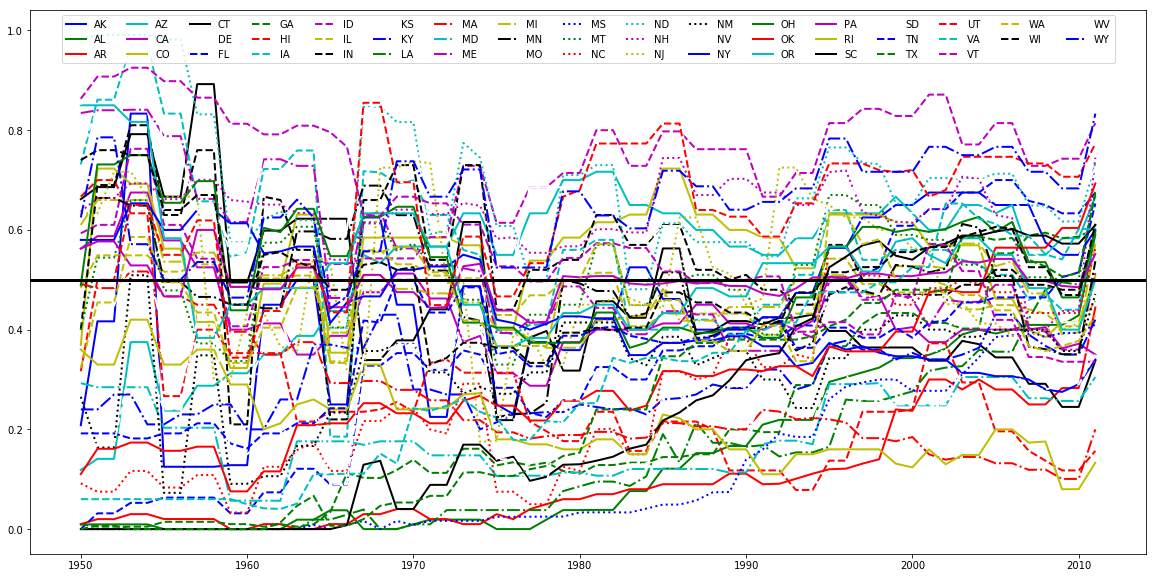

In [3]:
# legend guide: https://matplotlib.org/1.3.1/users/legend_guide.html
# markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}

states = p.columns.unique()
mycolors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers = ['.', ',', 'o', 'v', '^', '<', '>', 'd']
linestyles = ['solid', 'dashed', 'dashdot', 'dotted','-', '--', '-.', ':']
print "Percentage of republicans in the state legislature."
print "TODO: aggreate these by themes."
print "Possible themes are:"
print "- correlation"
print "- region"
print "- degree of urban density"
print "- degree of inequality"
print "- coastal vs inner"
print '==================================================================='
print "Comments:"
print "- Long term trends aside, republican representaton tends to spike and recede "
print "  in sort cycles. The current cycle is strong, like 1966."
print "- One can also see an era of clear republican dominance (pre-1976), an era of clear democrat "
print "  dominance (1976 - 1994), and the current era where the spikes are less pronounced and the trend"
print "  less clear."
print "- There is no precedent for sustained peak levels, and betting on that happening now is probably a mistake."
fig, ax = plt.subplots(figsize=(20, 10))
ic = 0
lc = 0
for state in states:
    ax.plot(p.index, p[state], mycolors[ic], label=state, linewidth=2, linestyle=linestyles[lc]) 
    ic = ic + 1
    if ic > 7: 
        ic = 0
        lc = lc + 1
    if lc > 7: lc = 0
ax.axhline(y=0.5, color='k', linestyle='-', linewidth=3)
ax.legend(loc='upper center', ncol=17)
plt.show(block=True)